In [2]:
import asdf
import numpy as np

import astropy.table

from pathlib import Path

In [23]:
cosmologies = astropy.table.Table.read('cosmologies.csv')

In [4]:
def read_all(dir, cen=np.array([-960.33453, -176.59247, -903.21063]), width=30):
    dir = Path(dir)
    sims = []
    for fn in sorted(dir.glob('*.asdf')):
        with asdf.open(fn) as af:
            t = af['data']
        t['pos'] -= cen - width/2
        
        # import a few more params from the cosmologies table
        cnum = t.meta['SimName'].split('_')[2][1:]
        root = f'abacus_cosm{cnum}'
        ic = list(cosmologies['root']).index(root)
        t.meta['sigma8_m'] = cosmologies[ic]['sigma8_m']
        t.meta['sigma8_cb'] = cosmologies[ic]['sigma8_cb']
        t.meta['alpha_s'] = cosmologies[ic]['alpha_s']
        
        sims += [t]
    return sims

sims = read_all('/mnt/home/lgarrison/ceph/multicosmo-viz/cutouts/')

In [7]:
pid_c000 = sims[0]['pid']
for sim in sims[1:]:
    isect, comm1, comm2 = np.intersect1d(pid_c000, sim['pid'], assume_unique=True, return_indices=True)
    pid_c000 = pid_c000[comm1]
    print(f'{len(pid_c000)/len(sims[0])*100:.4g}%', end='  ')

99.85%  95.87%  95.71%  91.12%  91.12%  91.11%  91.1%  91.1%  91.1%  91.1%  91.1%  91.1%  91.1%  91.1%  91.1%  91.1%  91.1%  91.06%  91.06%  91.06%  91.06%  91.05%  91.03%  91.03%  91.03%  91.03%  91.03%  91.03%  91.02%  91.02%  91.02%  91.01%  91.01%  91.01%  91.01%  91.01%  91.01%  91.01%  91.01%  91.01%  91.01%  91.01%  86.57%  86.57%  86.57%  86.43%  86.03%  86.02%  86.02%  85.61%  85.61%  85.61%  85.6%  85.6%  85.6%  85.57%  85.56%  85.56%  85.56%  85.56%  84.52%  84.52%  84.5%  84.49%  82.54%  82.53%  82.53%  82.53%  82.53%  82.53%  82.53%  81.21%  81.2%  81.2%  81.2%  81.2%  81.2%  81.2%  81.2%  81.2%  81.2%  81.19%  81.19%  81.18%  81.18%  81.18%  81.18%  81.12%  81.12%  81.12%  81.12%  81.12%  81.12%  81.12%  

In [6]:
traj = np.empty((len(pid_c000),len(sims),3), dtype=np.float32)

for i,sim in enumerate(sims):
    isect, comm1, comm2 = np.intersect1d(pid_c000, sim['pid'], assume_unique=True, return_indices=True)
    assert(len(comm2) == len(traj))
    traj[:,i] = sim['pos'][comm2]

traj = astropy.table.Table(dict(pos=traj), meta={i:sims[i].meta for i in range(len(sims))})

with asdf.AsdfFile(dict(data=traj)) as af:
    af.write_to('/mnt/home/lgarrison/ceph/multicosmo-viz/traj.asdf')

In [19]:
isect, comm1, comm2 = np.intersect1d(t1['pid'], t2['pid'], assume_unique=True, return_indices=True)

In [22]:
len(isect)/len(t2)

0.9755265797392176

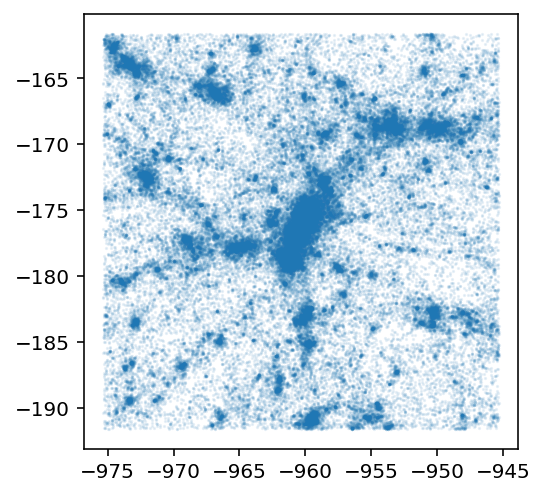

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(dpi=144)
ax.set_aspect('equal')
ax.scatter(t['pos'][:,0],t['pos'][:,1], s=0.4, alpha=0.1)